In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
pip install scikit-learn==1.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
raw_boston = load_boston()

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [3]:
print(raw_boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
print(raw_boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
print(raw_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston = pd.DataFrame(raw_boston.data, columns=raw_boston.feature_names)

dataset = pd.DataFrame(np.c_[boston['CRIM'], boston['ZN'], boston['INDUS'], boston['CHAS'], boston['NOX'], boston['RM'], boston['AGE'], boston['DIS'], boston['RAD'], boston['TAX'], boston['PTRATIO'], boston['B'], boston['LSTAT']], 
                       columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])

X  = dataset[:-100]
Y = raw_boston.target[:-100]
Xtest = dataset[-100:]
Ytest = raw_boston.target[-100:]

# X  = dataset[:400, 1]
# Y = raw_boston.target[:400]
# Xtest = dataset[400:, 1]
# Ytest = raw_boston.target[:400]

In [7]:
print(X.shape, Y.shape, Xtest.shape, Ytest.shape)

(406, 13) (406,) (100, 13) (100,)


In [8]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
u = np.mean(dataset, axis = 0)
std = np.std(dataset, axis = 0)
print(u.shape, std.shape)

(13,) (13,)


In [10]:
X = (X-u)/std  #yahn pucho mean zero kun hoga
Xtest = (Xtest-u)/std
X = np.array(X)
Xtest = np.array(Xtest)

In [11]:
#Normalised
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


<ipython-input-12-2137f65615b1>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(406, 13) (406,)


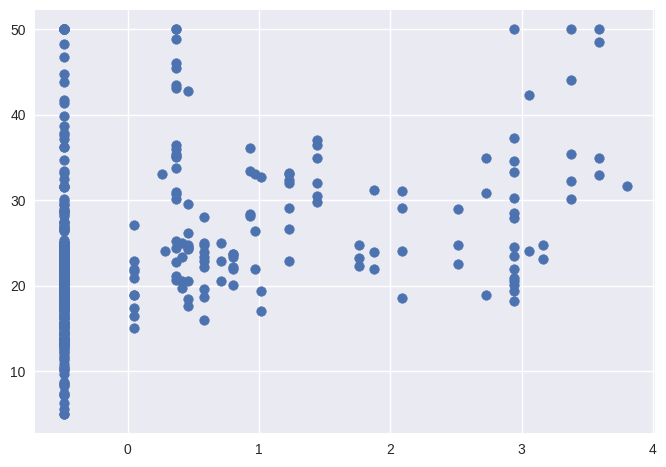

In [12]:
plt.style.use('seaborn')
print(X.shape, Y.shape)
plt.scatter(X[:, 1], Y)
plt.show()

In [36]:
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
print(X[:13, :])

[[ 1.          1.          1.         -0.41978194  0.28482986 -1.2879095
  -0.27259857 -0.14421743  0.41367189 -0.12001342  0.1402136  -0.98284286
  -0.66660821 -1.45900038  0.44105193 -1.0755623 ]
 [ 1.          1.          1.         -0.41733926 -0.48772236 -0.59338101
  -0.27259857 -0.74026221  0.19427445  0.36716642  0.55715988 -0.8678825
  -0.98732948 -0.30309415  0.44105193 -0.49243937]
 [ 1.          1.          1.         -0.41734159 -0.48772236 -0.59338101
  -0.27259857 -0.74026221  1.28271368 -0.26581176  0.55715988 -0.8678825
  -0.98732948 -0.30309415  0.39642699 -1.2087274 ]
 [ 1.          1.          1.         -0.41675042 -0.48772236 -1.30687771
  -0.27259857 -0.83528384  1.01630251 -0.80988851  1.07773662 -0.75292215
  -1.10611514  0.1130321   0.41616284 -1.36151682]
 [ 1.          1.          1.         -0.41248185 -0.48772236 -1.30687771
  -0.27259857 -0.83528384  1.22857665 -0.51117971  1.07773662 -0.75292215
  -1.10611514  0.1130321   0.44105193 -1.02650148]
 [ 1.   

In [14]:
def hypothesis(x, theta):
  y_ = 0
  n = x.shape[0]

  for i in range(n):
    y_ += theta[i]*x[i]

  return y_

In [15]:
def cost(X, Y, theta):
  m = X.shape[0]
  total_error = 0

  for i in range(m):
    y_p = hypothesis(X[i], theta)

    total_error += (y_p - Y[i])**2

  return total_error/m

In [16]:
def gradient(X, Y, theta):
  m, n = X.shape

  grad = np.zeros((n,))

  for j in range(n):
    for i in range(m): #gradient nikale ga and usko optimize kare ga

      x = X[i]

      y_p = hypothesis(x, theta)

      y_t = Y[i]

      grad[j] += (y_p - y_t) * x[j]

  return grad/m

In [17]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 3000):

  m, n = X.shape
  theta = np.zeros((n, ))
  cost_epoch = []

  for i in range(max_steps):

    grad = gradient(X, Y, theta)

    e = cost(X, Y, theta)
    cost_epoch.append(e)

    for j in range(n):

      theta[j] = theta[j] - learning_rate * grad[j]

  return theta, cost_epoch

In [18]:
theta, cost_epoch, = gradient_descent(X, Y, learning_rate=0.01, max_steps = 2000)

In [19]:
theta

array([ 2.29278104e+01, -1.47194801e+00,  9.54506351e-01,  5.93279836e-02,
        5.44927801e-01, -1.39522746e+00,  3.33409219e+00,  2.05562539e-02,
       -2.70276933e+00,  2.66482104e+00, -1.51031826e+00, -1.66863101e+00,
        3.84517955e-01, -3.86301112e+00])

In [20]:
cost_epoch[-10:]

[22.9089741135129,
 22.908665592247086,
 22.908357558424303,
 22.908050011131383,
 22.90774294945725,
 22.907436372492633,
 22.90713027933044,
 22.906824669065326,
 22.906519540794058,
 22.906214893615246]

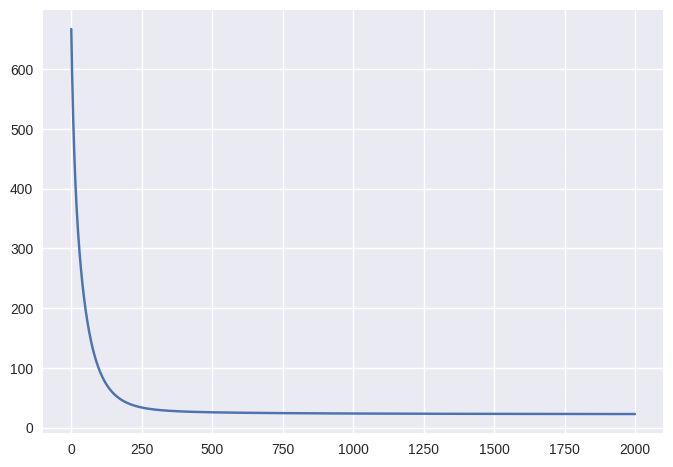

In [21]:
plt.plot(cost_epoch)
plt.show()

In [22]:
ones = np.ones((Xtest.shape[0], 1))
Xtest = np.hstack((ones, Xtest))
print(Xtest[:4, :4], Xtest.shape)

[[ 1.          1.99029374 -0.48772236  1.01599907]
 [ 1.          0.97027072 -0.48772236  1.01599907]
 [ 1.          0.4410972  -0.48772236  1.01599907]
 [ 1.          1.25971423 -0.48772236  1.01599907]] (100, 14)


In [23]:
y_pred_test = []

for i in range(Xtest.shape[0]):
  pred = hypothesis(Xtest[i], theta)
  y_pred_test.append(pred)

y_pred_test = np.array(y_pred_test)

In [24]:
for i in range(len(y_pred_test)):
  print(y_pred_test[i], Ytest[i])

6.415198676196408 11.9
20.670812228764003 27.9
14.219745183194608 17.2
21.882966046618865 27.5
14.954137057173718 15.0
19.55530309973885 17.2
1.9213081511183994 17.9
11.198551861309188 16.3
-5.663861979654708 7.0
12.149309110511256 7.2
16.798373188708364 7.5
7.395786932217366 10.4
4.945839537331086 8.8
18.147470581387257 8.4
21.56361779346236 16.7
19.949537052312227 14.2
19.28412960388865 20.8
16.014047047546526 13.4
16.78174482773576 11.7
12.316106619291979 8.3
18.44312205028998 10.2
15.47437076920831 10.9
17.065151152604432 11.0
16.048501596462902 9.5
20.654063364892792 14.5
21.530208033946348 14.1
24.271515445502928 16.1
20.518722328514905 14.3
18.704316994316986 11.7
16.627959462146585 13.4
17.90676672008525 9.6
11.802796729849106 8.7
7.292559884586417 8.4
13.987620832635185 12.8
13.056100434470283 10.5
19.08789138510191 17.1
20.601852719987765 18.4
19.90110839372224 15.4
13.23064365212769 10.8
15.41402653357712 11.8
20.008590708805684 14.9
19.82467709134572 12.6
18.978675510598716

In [25]:
from sklearn import metrics

print('MAE', metrics.mean_absolute_error(Ytest, y_pred_test))
print('MSE', metrics.mean_absolute_error(Ytest, y_pred_test))
print('RMSE', np.sqrt(metrics.mean_absolute_error(Ytest, y_pred_test)))

MAE 4.079941406772498
MSE 4.079941406772498
RMSE 2.0198864836352803


In [26]:
#Vectorization

In [27]:
def hypothesis(x, theta):
  return np.dot(x, theta)

In [28]:
def cost(X, Y, theta):
  m = X.shape[0]
  total_error = 0

  y_p = hypothesis(X, theta)
  total_error = np.sum((y_p - Y) ** 2)

  return total_error/m

In [29]:
def gradient(X, Y, theta):

  y_p = hypothesis(X, theta)

  grad = np.dot(X.T, (y_p - Y))

  return grad/X.shape[0]

In [30]:
def gradient_descent(X, Y, learning_rate = 0.001, max_steps = 1000):

  m, n = X.shape
  theta = np.zeros((n, ))
  cost_epoch = []

  for i in range(max_steps):

    grad = gradient(X, Y, theta)

    e = cost(X, Y, theta)
    cost_epoch.append(e)

    theta = theta - learning_rate*grad

  return theta, cost_epoch

In [31]:
theta, cost_epoch = gradient_descent(X, Y, learning_rate=0.01)

In [32]:
theta

array([ 2.24903523e+01, -1.17614502e+00,  9.22678485e-01, -1.26493278e-01,
        6.06858870e-01, -7.12392519e-01,  3.25559781e+00,  4.63799746e-03,
       -2.49726901e+00,  1.55070140e+00, -9.52324898e-01, -1.56499850e+00,
        1.58761591e+00, -4.03478811e+00])

In [33]:
cost_epoch[-10:]

[23.765878055121718,
 23.76389866771053,
 23.76192366676482,
 23.75995304023333,
 23.75798677610968,
 23.756024862432152,
 23.754067287283412,
 23.752114038790307,
 23.75016510512357,
 23.74822047449764]

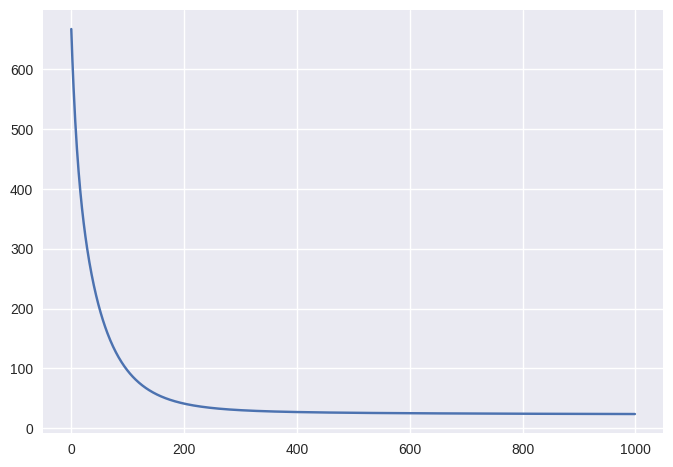

In [34]:
plt.plot(cost_epoch)
plt.show()